# Constraint upset plot
Plot the intersection of constrained transcripts and regions

In [63]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
# Imports
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
import pandas as pd
import seaborn as sns
import upsetplot

from src import constants as C
from src import visualisation as vis
from src import statistics_for_plots as sp

_FILE_IN = "data/statistics/constraint_upset_data.tsv"

In [65]:
# Style and colors
plt.style.use([C.STYLE_DEFAULT, C.COLOR_REGIONS])


In [66]:
# Read data
df = pd.read_csv(_FILE_IN, sep="\t", index_col="enst")

In [67]:
# Reformat prior to plotting
upset_data = upsetplot.from_indicators(C.REGION_LABELS, data=df)

In [68]:
upset = upsetplot.UpSet(
    upset_data,
    sort_by="degree",
    sort_categories_by="-input",
    max_subset_size=2500,
    # show_counts=True,
    element_size=18,
    intersection_plot_elements=3,
    totals_plot_elements=3,
    facecolor="Black",
    # element_size=None
)

# Colour category shading and bars
for region, colour in zip(list(sp._REGION_LABELS), sns.color_palette()):
    upset.style_categories(
        region,
        shading_facecolor=to_rgba(colour, alpha=0.5),
        bar_facecolor=colour,
    )

/tmp/ipykernel_18065/4293368568.py:22: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig("data/plots/fig_2_upset_plot.svg")
/tmp/ipykernel_18065/4293368568.py:23: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig("data/plots/fig_2_upset_plot.png", dpi=1000)
/mnt/iusers01/bk01/m40482ab/miniforge3/envs/ukb/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


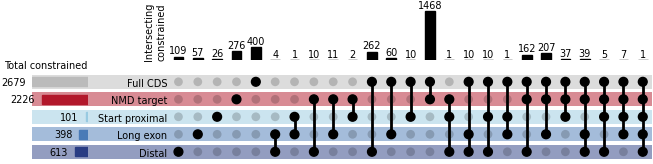

In [69]:
# Plot the figure
fig = plt.figure(figsize=(18 * C.CM, 4.33 * C.CM), layout=("constrained"))
u = upset.plot(fig);

# Customise the "totals" Axes
u["totals"].grid(False)
u["totals"].set_xticks([])
u["totals"].spines["bottom"].set_visible(False)
u["totals"].set_title("Total constrained", loc="right", ha="right")
for c in u["totals"].containers:
    u["totals"].bar_label(c, padding=5)

# Customise the "intersection" Axes
u["intersections"].set_ylabel("Intersecting\nconstrained", va="bottom", loc="bottom")
u["intersections"].grid(False)
u["intersections"].set_yticks([])
u["intersections"].spines["left"].set_visible(False)
for c in u["intersections"].containers:
    u["intersections"].bar_label(c, padding=1, fontsize=7)

# Save figure
plt.savefig("data/plots/fig_2_upset_plot.svg")
plt.savefig("data/plots/fig_2_upset_plot.png", dpi=1000)
